<a href="https://colab.research.google.com/github/HibaBenHsouna1777/Movie-Recommendation-System-/blob/main/MoviesRecommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

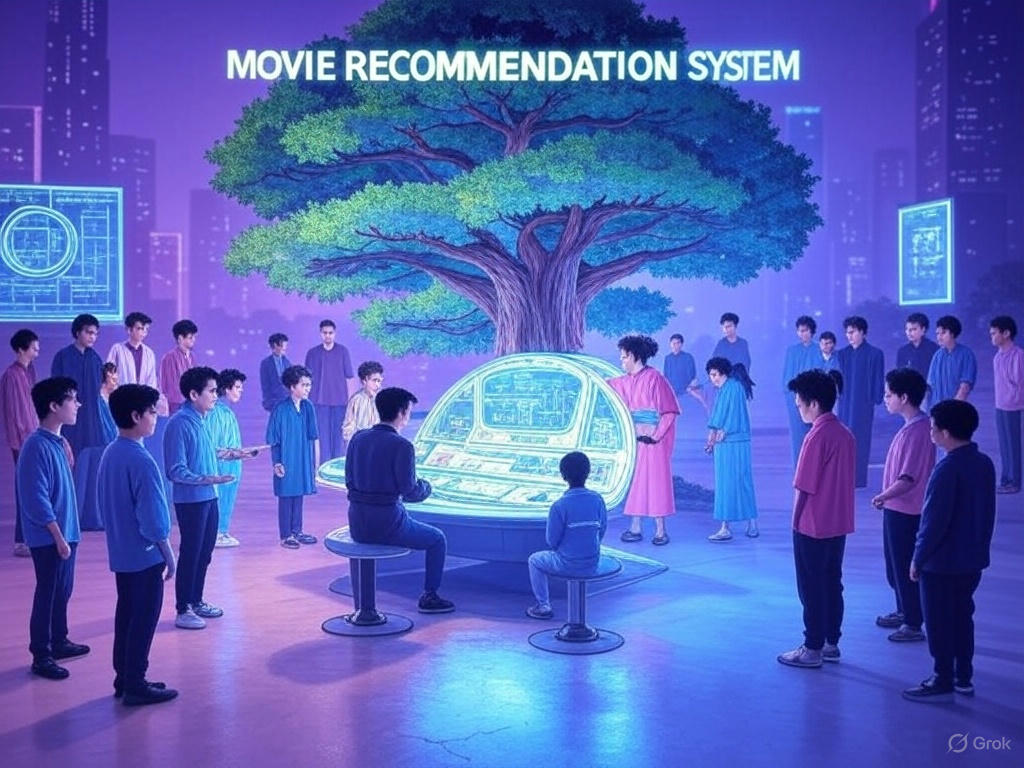

In [2]:
import pandas as pd
import numpy as np

In [3]:
movies = pd.read_csv('dataset.csv')

In [4]:
movies.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [7]:
movies['tags']=movies['overview']+movies['genre']

In [10]:
new_df = movies[['id','title','genre','overview','tags']]

In [11]:
new_df.head()

,id,title,genre,overview,tags
0,278,The Shawshank Redemption,"Drama,Crime",Framed in the 1940s for the double murder of h...,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second...","Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Drama,Crime","Spanning the years 1945 to 1955, a chronicle o...","Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,"Drama,History,War",The true story of how businessman Oskar Schind...,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,"Drama,Crime",In the continuing saga of the Corleone crime f...,In the continuing saga of the Corleone crime f...


In [26]:
new_df.drop(columns=['overview','genre'])

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


Why: This is the core of our text processing! CountVectorizer takes text and converts it into a numerical matrix.
max_features=1000 limits the number of words/phrases we consider to the 1000 most frequent ones (to reduce complexity).
stop_words='english' removes common English words (like "the," "a," "is") that don't usually carry much meaning.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000,stop_words='english')

In [28]:
cv

CountVectorizer(max_features=1000, stop_words='english')

Why: This is where the magic happens!
fit_transform() does two things:
Fit: It learns the vocabulary from the 'tags' column (figures out all the unique words/phrases).
Transform: It converts the text in the 'tags' column into a numerical matrix, where each row represents a movie, and each column represents a word/phrase from the vocabulary. The values in the matrix represent the frequency of each word/phrase in each movie.

In [29]:
vec = cv.fit_transform(new_df['tags'].values.astype('U')).toarray()

In [30]:
vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
vec.shape

(10000, 1000)

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
sim = cosine_similarity(vec)

In [34]:
sim

array([[1.        , 0.10114435, 0.20851441, ..., 0.11616046, 0.16718346,
        0.09325048],
       [0.10114435, 1.        , 0.14552138, ..., 0.        , 0.06482037,
        0.        ],
       [0.20851441, 0.14552138, 1.        , ..., 0.03713907, 0.1069045 ,
        0.13416408],
       ...,
       [0.11616046, 0.        , 0.03713907, ..., 1.        , 0.04962917,
        0.04152274],
       [0.16718346, 0.06482037, 0.1069045 , ..., 0.04962917, 1.        ,
        0.05976143],
       [0.09325048, 0.        , 0.13416408, ..., 0.04152274, 0.05976143,
        1.        ]])

In [35]:
new_df[new_df['title']=='The Godfather: Part II']

,id,title,genre,overview,tags
4,240,The Godfather: Part II,"Drama,Crime",In the continuing saga of the Corleone crime f...,In the continuing saga of the Corleone crime f...


In [38]:
dist=sorted(list(enumerate(sim[4])),reverse=True,key=lambda vector:vector[1])

In [39]:
dist

[(4, np.float64(1.0)),
 (2, np.float64(0.5820855000871992)),
 (1611, np.float64(0.5185629788417315)),
 (4569, np.float64(0.5118906968889915)),
 (5010, np.float64(0.5118906968889915)),
 (9520, np.float64(0.5007733956671915)),
 (1456, np.float64(0.4850712500726658)),
 (2200, np.float64(0.47087095579741867)),
 (2174, np.float64(0.46017899330842227)),
 (4360, np.float64(0.45834924851410563)),
 (7259, np.float64(0.4455663943395035)),
 (2753, np.float64(0.44513190725972573)),
 (1823, np.float64(0.4387634544762784)),
 (3481, np.float64(0.4387634544762784)),
 (7322, np.float64(0.4387634544762784)),
 (3576, np.float64(0.4338609156373123)),
 (7147, np.float64(0.4338609156373123)),
 (1762, np.float64(0.42874646285627205)),
 (2587, np.float64(0.42874646285627205)),
 (3795, np.float64(0.42874646285627205)),
 (4872, np.float64(0.42874646285627205)),
 (6195, np.float64(0.4280863447390447)),
 (7280, np.float64(0.4244373438135828)),
 (2624, np.float64(0.42340489921997054)),
 (412, np.float64(0.42008402

In [43]:
for i in dist[0:5]:
  print(new_df.iloc[i[0]].title)

The Godfather: Part II
The Godfather
The Godfather: Part III
House of Gucci
Batman: The Killing Joke


In [44]:
def recommend (movies):
  index = new_df[new_df['title']==movies].index[0]#.index: This gets the index (row number) of the selected movie. Since we expect only one movie with that title, we use [0] to get the first element of the index (which is the actual index of the movie).
  dist=sorted(list(enumerate(sim[index])),reverse=True,key=lambda vector:vector[1])
  for i in dist[0:5]:
    print(new_df.iloc[i[0]].title)#iloc is used to access data by its row index.

In [47]:
recommend('Iron Man')

Iron Man
Guardians of the Galaxy Vol. 2
Star Wars: Episode III - Revenge of the Sith
G.O.R.A.
Mad Max Beyond Thunderdome
